#### Importar as bibliotecas

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import skew, kurtosis

#### Dataframe (criando as variáveis e visualizando os dados)

In [92]:
# Criando o dataframe com os dados do exercicio
data = {
    'Amostra': list(range(1, 21)),
    'Profundidade': [120, 250, 340, 180, 410, 90, 220, 310, 150, 370, 200, 330, 140, 280, 390, 100, 260, 300, 160, 350],
    'Sílica': [58.2, 60.1, 59.0, 61.5, 60.2, 62.0, 59.8, 54.8, 54.1, 55.2, 56.3, 54.6, 56.4, 60.2, 56.1, 63.0, 57.8, 59.9, 56.0, 62.0],
    'Densidade': [2.68, 2.75, 2.70, 2.80, 2.85, 2.90, 2.82, 2.63, 2.61, 2.64, 2.66, 2.60, 2.64, 2.83, 2.65, 2.84, 2.68, 2.72, 2.66, 2.80],
    'Resistência': [85.3, 91.6, 89.4, 95.0, 90.1, 97.5, 93.0, 78.4, 76.3, 79.9, 80.4, 76.8, 79.7, 92.2, 81.0, 98.4, 83.5, 87.6, 81.0, 95.0]
}

df = pd.DataFrame(data)

print(df.to_string())  # Mostra todas as linhas e colunas

    Amostra  Profundidade  Sílica  Densidade  Resistência
0         1           120    58.2       2.68         85.3
1         2           250    60.1       2.75         91.6
2         3           340    59.0       2.70         89.4
3         4           180    61.5       2.80         95.0
4         5           410    60.2       2.85         90.1
5         6            90    62.0       2.90         97.5
6         7           220    59.8       2.82         93.0
7         8           310    54.8       2.63         78.4
8         9           150    54.1       2.61         76.3
9        10           370    55.2       2.64         79.9
10       11           200    56.3       2.66         80.4
11       12           330    54.6       2.60         76.8
12       13           140    56.4       2.64         79.7
13       14           280    60.2       2.83         92.2
14       15           390    56.1       2.65         81.0
15       16           100    63.0       2.84         98.4
16       17   

#### Medidas de posição (média, mediana e moda)

In [ ]:
from scipy.stats import mode

# Lista das variáveis da lista
variaveis = ['Profundidade', 'Sílica', 'Densidade', 'Resistência']

print("\n--- Medidas de Posição: Média, Moda e Mediana ---")

for var in variaveis:
    media = df[var].mean()
    mediana = df[var].median()
    # Calculando a moda (a scipy.stats.mode retorna um array, então usa-se [0] pra pegar o valor)
    moda_resultado = mode(df[var], keepdims=True)
    moda = moda_resultado.mode[0]
    
    print(f"\n{var}:")
    print(f"Média: {media:.2f}")
    print(f"Mediana: {mediana:.2f}")
    print(f"Moda: {moda:.2f}")



--- Medidas de Posição: Média, Moda e Mediana ---

Profundidade:
Média: 247.50
Mediana: 255.00
Moda: 90.00

Sílica:
Média: 58.36
Mediana: 58.60
Moda: 60.20

Densidade:
Média: 2.72
Mediana: 2.69
Moda: 2.64

Resistência:
Média: 86.60
Mediana: 86.45
Moda: 81.00


#### Assimetria e Curtose

In [94]:
print("\n--- Assimetria e Curtose ---")
for coluna in ['Profundidade', 'Sílica', 'Densidade', 'Resistência']:
    assimetria = skew(df[coluna])
    curtose = kurtosis(df[coluna])
    print(f"{coluna}: Assimetria = {assimetria:.4f}, Curtose = {curtose:.4f}")


--- Assimetria e Curtose ---
Profundidade: Assimetria = -0.0305, Curtose = -1.2828
Sílica: Assimetria = 0.0092, Curtose = -1.2934
Densidade: Assimetria = 0.4068, Curtose = -1.2198
Resistência: Assimetria = 0.1290, Curtose = -1.3786


#### Representação gráfica (histrograma, boxplot e gráfico de dispersão)

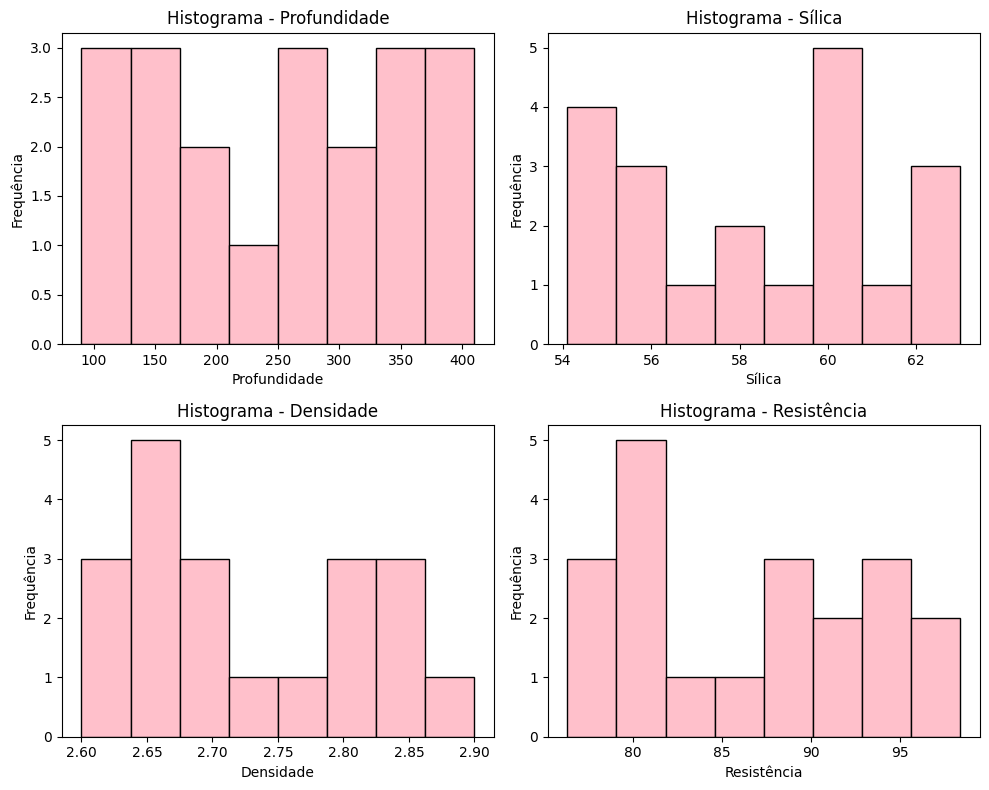

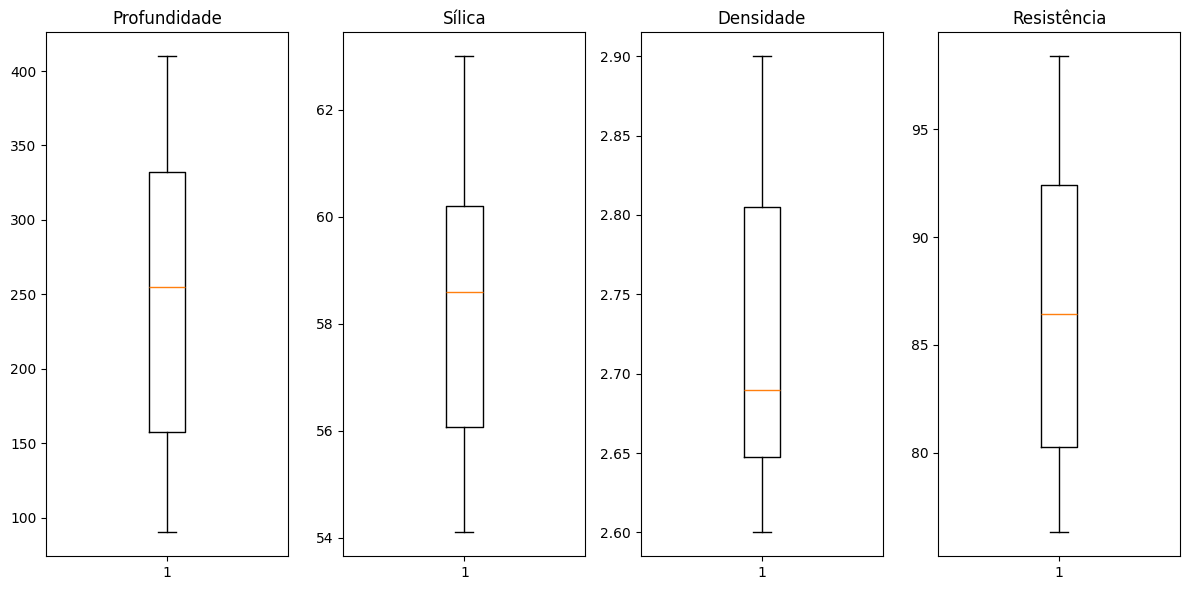

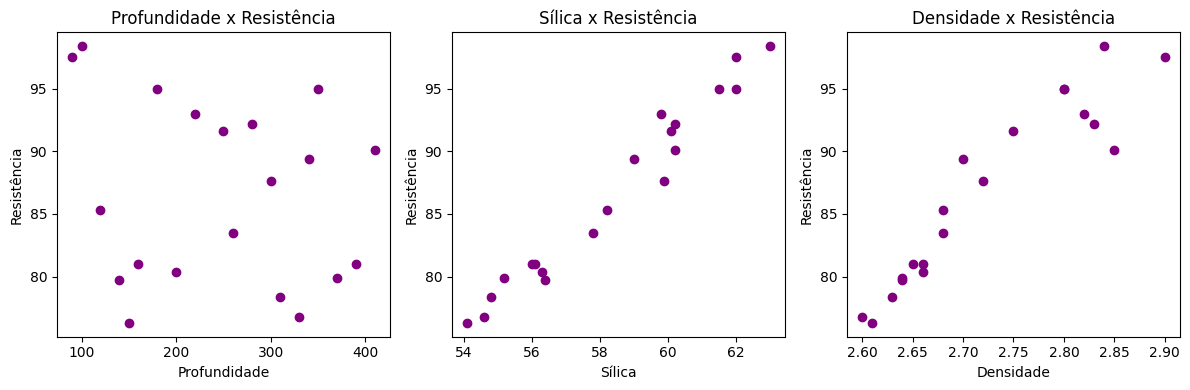

In [95]:
# Histogramas (distribuição das variáveis)
plt.figure(figsize=(10, 8))
variaveis = ['Profundidade', 'Sílica', 'Densidade', 'Resistência']
for i, var in enumerate(variaveis):
    plt.subplot(2, 2, i+1)
    plt.hist(df[var], bins=8, color='pink', edgecolor='black')
    plt.title(f'Histograma - {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Boxplots (dispersão e outliers)
plt.figure(figsize=(12, 6))
for i, var in enumerate(variaveis):
    plt.subplot(1, 4, i+1)
    plt.boxplot(df[var])
    plt.title(var)
plt.tight_layout()
plt.show()

# Gráficos de Dispersão (cada variável x Resistência)
plt.figure(figsize=(12, 4))
for i, var in enumerate(variaveis[:-1]):  # Não incluir resistência como X
    plt.subplot(1, 3, i+1)
    plt.scatter(df[var], df['Resistência'], color='purple')
    plt.xlabel(var)
    plt.ylabel('Resistência')
    plt.title(f'{var} x Resistência')
plt.tight_layout()
plt.show()

#### Matriz da correlação


--- Matriz de Correlação ---
               Amostra  Profundidade    Sílica  Densidade  Resistência
Amostra       1.000000      0.110329 -0.065659  -0.132785    -0.139564
Profundidade  0.110329      1.000000 -0.174324  -0.148224    -0.183319
Sílica       -0.065659     -0.174324  1.000000   0.918427     0.982319
Densidade    -0.132785     -0.148224  0.918427   1.000000     0.940513
Resistência  -0.139564     -0.183319  0.982319   0.940513     1.000000


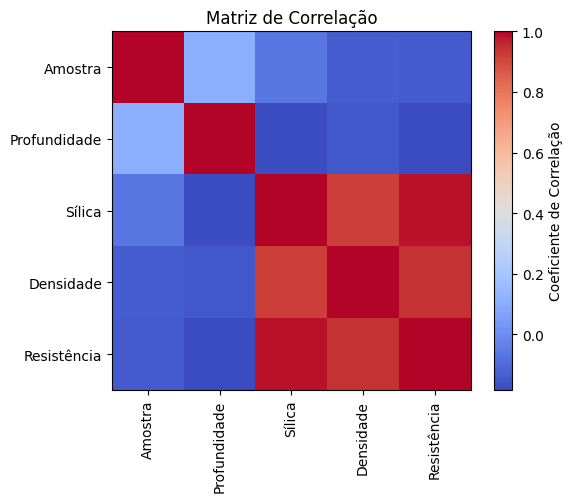

In [96]:
correlacao = df.corr(numeric_only=True)
print("\n--- Matriz de Correlação ---")
print(correlacao)

# Visual (opcional, mas legal de ter)
plt.figure(figsize=(6, 5))
plt.imshow(correlacao, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Coeficiente de Correlação')
plt.xticks(range(len(correlacao)), correlacao.columns, rotation=90)
plt.yticks(range(len(correlacao)), correlacao.columns)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

#### Regressão Linear


--- Regressão Linear Simples para cada variável ---

Variável: Profundidade
Equação da reta: Resistência = -0.0131 * Profundidade + 89.8445
R²: 0.0336


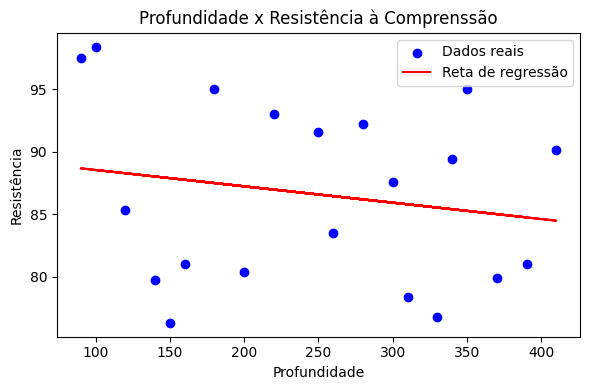


Variável: Sílica
Equação da reta: Resistência = 2.5553 * Sílica + -62.5214
R²: 0.9649


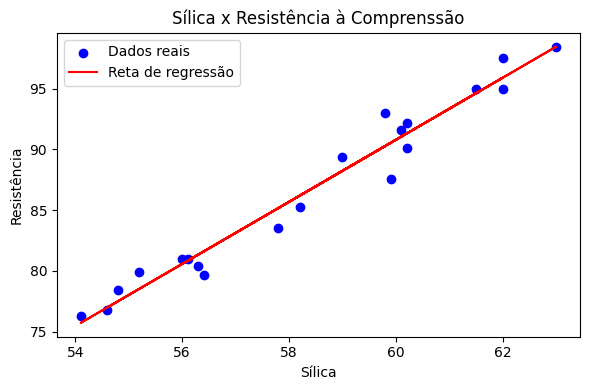


Variável: Densidade
Equação da reta: Resistência = 73.4990 * Densidade + -113.5326
R²: 0.8846


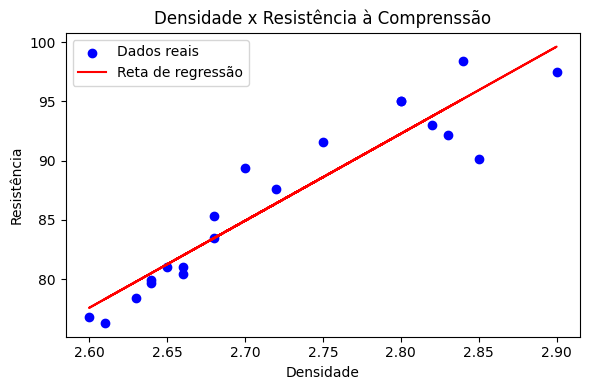


Variável: Resistência
Equação da reta: Resistência = 1.0000 * Resistência + 0.0000
R²: 1.0000


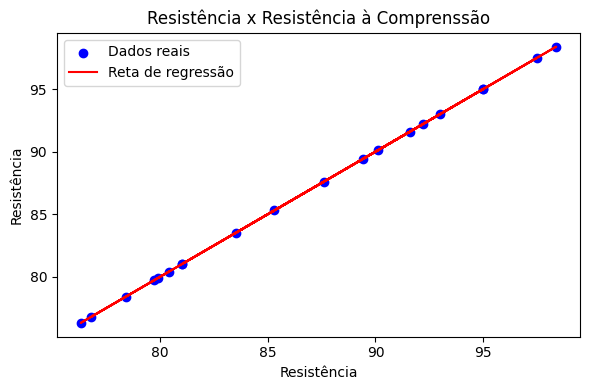

In [101]:
# Variáveis independentes (explicativas)
variaveis_explicativas = ['Profundidade', 'Sílica', 'Densidade', 'Resistência']

# Variável dependente
y = df['Resistência']

print("\n--- Regressão Linear Simples para cada variável ---")

for var in variaveis_explicativas:
    X = df[[var]]  # Transformando em matriz 2D (requisito do sklearn)
    
    # Criando o modelo
    modelo = LinearRegression()
    modelo.fit(X, y)
    
    # Parâmetros para a regressão
    a = modelo.coef_[0]
    b = modelo.intercept_
    r2 = modelo.score(X, y)
    
    # Exibindo os resultados
    print(f"\nVariável: {var}")
    print(f"Equação da reta: Resistência = {a:.4f} * {var} + {b:.4f}")
    print(f"R²: {r2:.4f}")
    
    # Plotando o gráfico da regressão
    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, color='blue', label='Dados reais')
    plt.plot(X, modelo.predict(X), color='red', label='Reta de regressão')
    plt.xlabel(var)
    plt.ylabel('Resistência')
    plt.title(f'{var} x Resistência à Comprenssão')
    plt.legend()
    plt.tight_layout()
    plt.show()
